## Задание 1.
( 6 баллов) Напишите функцию, которая моделирует один нейрон с сигмоидной активацией и реализует вычисление градиента для обновления весов и смещений нейрона. Функция должна принимать список векторов признаков, ассоциированные бинарные метки класса, начальные веса, начальное смещение, скорость обучения и количество эпох. Функция должна обновлять веса и смещение с помощью градиентного спуска (классической версии) на основе функции потерь NLL и возвращать обновленные веса, смещение и список значений NLL для каждой эпохи, округленное до четырех десятичных знаков.
Проведите обучение на предоставленном наборе данных. Опционально сгенерируйте другие подходящие наборы данных. Опишите ваши результаты. Предоставленная функция будет также протестирована во время защиты ДЗ.
Можно использовать только чистый torch (без использования autograd и torch.nn). 
Пример:
```
input: features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]], 
labels = [1, 0, 0], 
initial_weights = [0.1, -0.2], 
initial_bias = 0.0, 
learning_rate = 0.1, 
epochs = 2
        output: 
updated_weights = [0.0808, -0.1916], updated_bias = -0.0214, mse_values = [0.2386, 0.2348]
```
* {*} Реализуйте один из следующих видов градиентного спуска: Stochastic Gradient Descent (SGD), Batch Gradient Descent, Mini-Batch Gradient Descent. Проведите эксперименты, покажите разницу в сходимости, сходимость в зависимости от формы поверхности. (2 балла)

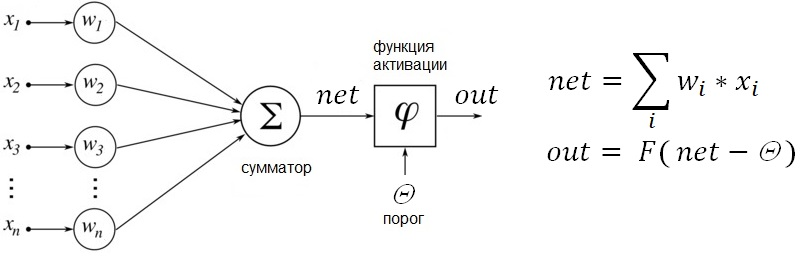

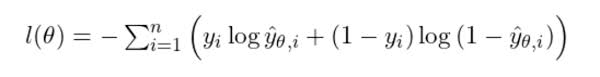

In [61]:
import torch

def nll_loss(y_pred, y_true):
    return -(y_true * torch.log(y_pred) + (1 - y_true) *  torch.log(1 - y_pred))

def nll_grad_w(error, x, w, b):
    return error * x

def nll_grad_b(error, x, w, b):
    return error

def mse_loss(y_pred, y_true):
    return (y_pred - y_true)**2

def mse_grad_w(error, x, w, b):
    alpha = torch.dot(w, x) + b
    return error * torch.exp(-alpha) / (1 + torch.exp(-alpha)) ** 2 * x

def mse_grad_b(error, x, w, b):
    alpha = torch.dot(w, x) + b
    return error * torch.exp(-alpha) / (1 + torch.exp(-alpha)) ** 2


In [62]:
def MyСrippledNeuron(features, labels, weights, bias, learning_rate, epochs, loss_fn, grad_b, grad_w):
    err_values = []

    for _ in range(epochs):
        total_err = 0.0
        # Для каждого семпла
        for i in range(len(features)):
            x = features[i]
            y = labels[i]
            
            alpha = torch.dot(weights, x) + bias
            y_pred = 1  / (1 + torch.exp(-alpha))
            
            loss = loss_fn(y_pred, y)
            total_err += loss.item()

            error = y_pred - y
            
            weights -= learning_rate * grad_w(error, x, weights, bias)
            bias -= learning_rate * grad_b(error, x, weights, bias)

        avg_err = total_err / len(features)
        err_values.append(round(avg_err, 4))
    
    updated_weights = [round(w.item(), 4) for w in weights]
    updated_bias = round(bias.item(), 4)

    return updated_weights, updated_bias, err_values

In [63]:
features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0], [0.5, 0.5], [0, 1]]
labels = [1, 0, 0, 0, 1]
initial_weights = [0.1, -0.2]
initial_bias = 0.0
learning_rate = 0.1
epochs = 100

features = torch.tensor(features,        dtype=torch.float32)
labels   = torch.tensor(labels,          dtype=torch.float32)
weights  = torch.tensor(initial_weights, dtype=torch.float32)
bias     = torch.tensor(initial_bias,    dtype=torch.float32)

In [64]:
weights

tensor([ 0.1000, -0.2000])

In [65]:
updated_weights, updated_bias, nll_values =  MyСrippledNeuron(
    features = features, 
    labels = labels, 
    weights = weights, 
    bias = bias, 
    learning_rate = learning_rate,
    epochs = epochs,
    loss_fn = nll_loss,
    grad_w = nll_grad_w,
    grad_b = nll_grad_b
)

nll_weights = updated_weights
nll_bias = updated_bias

print("Updated Weights:", updated_weights)
print("Updated Bias:", updated_bias)
print("NLL Values:", nll_values)

Updated Weights: [-2.6127, 3.31]
Updated Bias: -1.471
NLL Values: [0.7963, 0.7179, 0.66, 0.614, 0.5755, 0.5422, 0.5129, 0.4868, 0.4634, 0.4424, 0.4233, 0.4059, 0.39, 0.3754, 0.362, 0.3497, 0.3382, 0.3276, 0.3177, 0.3085, 0.2999, 0.2918, 0.2842, 0.2771, 0.2704, 0.264, 0.258, 0.2524, 0.247, 0.2419, 0.237, 0.2324, 0.228, 0.2238, 0.2197, 0.2159, 0.2122, 0.2086, 0.2052, 0.202, 0.1988, 0.1958, 0.1929, 0.1901, 0.1874, 0.1848, 0.1822, 0.1798, 0.1774, 0.1751, 0.1729, 0.1708, 0.1687, 0.1667, 0.1647, 0.1628, 0.1609, 0.1591, 0.1573, 0.1556, 0.154, 0.1523, 0.1508, 0.1492, 0.1477, 0.1462, 0.1448, 0.1434, 0.142, 0.1407, 0.1394, 0.1381, 0.1368, 0.1356, 0.1344, 0.1332, 0.1321, 0.1309, 0.1298, 0.1287, 0.1277, 0.1266, 0.1256, 0.1246, 0.1236, 0.1226, 0.1217, 0.1207, 0.1198, 0.1189, 0.118, 0.1172, 0.1163, 0.1154, 0.1146, 0.1138, 0.113, 0.1122, 0.1114, 0.1107]


* {*} Выберите другую функцию потерь, проведите обучение с ее помощью. Сгенерируйте датасеты, на которых будет видна разница между алгоритмами. Покажите, в каких случаях выбор влияет на обучение. (2 балла)


In [66]:
features = torch.tensor(features,        dtype=torch.float32)
labels   = torch.tensor(labels,          dtype=torch.float32)
weights  = torch.tensor(initial_weights, dtype=torch.float32)
bias     = torch.tensor(initial_bias,    dtype=torch.float32)

/tmp/ipykernel_36405/3736152397.py:1: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_36405/3736152397.py:2: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [67]:
updated_weights, updated_bias, mse_values =  MyСrippledNeuron(
    features = features, 
    labels = labels, 
    weights = weights, 
    bias = bias, 
    learning_rate = learning_rate,
    epochs = epochs,
    loss_fn = mse_loss,
    grad_w=mse_grad_w,
    grad_b=mse_grad_b
)

mse_weights = updated_weights
mse_bias = updated_bias

print("Updated Weights:", updated_weights)
print("Updated Bias:", updated_bias)
print("MSE Values:", mse_values)

Updated Weights: [-1.0628, 1.4347]
Updated Bias: -0.6204
MSE Values: [0.2924, 0.2818, 0.272, 0.2629, 0.2545, 0.2469, 0.2398, 0.2332, 0.2272, 0.2215, 0.2163, 0.2113, 0.2066, 0.2022, 0.198, 0.194, 0.1901, 0.1864, 0.1828, 0.1794, 0.1761, 0.1729, 0.1698, 0.1668, 0.164, 0.1612, 0.1584, 0.1558, 0.1533, 0.1508, 0.1484, 0.1461, 0.1438, 0.1417, 0.1395, 0.1375, 0.1355, 0.1335, 0.1316, 0.1298, 0.128, 0.1262, 0.1245, 0.1229, 0.1213, 0.1197, 0.1182, 0.1167, 0.1153, 0.1139, 0.1125, 0.1112, 0.1099, 0.1086, 0.1073, 0.1061, 0.105, 0.1038, 0.1027, 0.1016, 0.1005, 0.0994, 0.0984, 0.0974, 0.0964, 0.0955, 0.0945, 0.0936, 0.0927, 0.0918, 0.091, 0.0901, 0.0893, 0.0885, 0.0877, 0.0869, 0.0862, 0.0854, 0.0847, 0.084, 0.0833, 0.0826, 0.0819, 0.0812, 0.0806, 0.0799, 0.0793, 0.0787, 0.0781, 0.0775, 0.0769, 0.0763, 0.0758, 0.0752, 0.0747, 0.0741, 0.0736, 0.0731, 0.0726, 0.0721]


In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

points = np.hstack((features, labels.view(-1,1)))
colors = ["red" if label else "blue" for label in labels]

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

Z1 = 1 / (1 + np.exp(-(nll_weights[0] * X + nll_weights[1] * Y + nll_bias)))
Z2 = 1 / (1 + np.exp(-(mse_weights[0] * X + mse_weights[1] * Y + mse_bias)))

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]],
                    subplot_titles=("NLLLoss", "MSELoss"))

fig.add_trace(go.Surface(z=Z1, x=X, y=Y, opacity=0.5, colorscale='Viridis', name='Probability'), row=1, col=1)
fig.add_trace(go.Surface(z=Z2, x=X, y=Y, opacity=0.5, colorscale='Cividis', name='Probability'), row=1, col=2)


for i in range(len(points)):
    # Координаты точки
    px, py, pz = points[i]

    # Вычисляем значения на поверхностях для каждой точки
    z1_val = 1 / (1 + np.exp(-(nll_weights[0] * px + nll_weights[1] * py + nll_bias)))
    z2_val = 1 / (1 + np.exp(-(mse_weights[0] * px + mse_weights[1] * py + mse_bias)))
    
    # Формируем всплывающие подсказки для каждой точки
    hover_text_1 = f"Point ({px}, {py}, {pz})<br>P(1)={z1_val:.2f}"
    hover_text_2 = f"Point ({px}, {py}, {pz})<br>P(1)={z2_val:.2f}"

    # Добавляем точки в первое окно (первая поверхность)
    fig.add_trace(go.Scatter3d(x=[px], y=[py], z=[pz],
                               mode='markers+text',
                               marker=dict(size=6, color=colors[i]),
                               text=hover_text_1, hoverinfo="text",
                               name=f'Point {i+1}'), row=1, col=1)
    
    # Добавляем точки во второе окно (вторая поверхность)
    fig.add_trace(go.Scatter3d(x=[px], y=[py], z=[pz],
                               mode='markers+text',
                               marker=dict(size=6, color=colors[i]),
                               text=hover_text_2, hoverinfo="text",
                               name=f'Point {i+1}'), row=1, col=2)

fig.show()

## Задание 2. {*}

(10 баллов) Реализуйте базовые функции autograd. Можете вдохновиться [видео от Andrej Karpathy](https://www.youtube.com/watch?v=VMj-3S1tku0). Напишите класс, аналогичный предоставленному классу 'Element', который реализует основные операции autograd: сложение, умножение и активацию ReLU. Класс должен обрабатывать скалярные объекты и правильно вычислять градиенты для этих операций посредством автоматического дифференцирования. Плюсом будет набор предоставленных тестов, оценивающих правильность вычислений. Большим плюсом будет, если тесты будут   написаны с помощью unittest. Можно использовать только чистый torch (без использования autograd и torch.nn). За каждую нереализованную операцию будет вычитаться 3 балла.
Пример: 
```
a = Element(2)
b = Element(-3)
c = Element(10)
d = a + b * c
e = d.relu()
e.backward()
print(a, b, c, d, e)
Output:  Element(data=2, grad=0)  Element(data=-3, grad=10)  Element(data=10, grad=-3)  Element(data=-28, grad=1)  Element(data=0, grad=1)
```
```python

class Element:
	def __init__(self, data, _children=(), _op=''):
		self.data = data
		self.grad = 0
		self._backward = lambda: None
		self._prev = set(_children)
		self._op = _op

	def __repr__(self):
		return f" Element(data={self.data}, grad={self.grad})"

	def __add__(self, other):
		 # Implement addition here
		pass

	def __mul__(self, other):
		# Implement multiplication here
		pass

	def relu(self):
		# Implement ReLU here
		pass

	def backward(self):
		# Implement backward pass here
		pass
```

In [69]:
class Element:
	def __init__(self, data, _label, _children=(), _op=''):
		self.data = data
		self.grad = 0
		self.label = _label
		self._backward = lambda: None
		self._prev = set(_children)
		self._op = _op

	def __repr__(self):
		return f" Element(data={self.data}, grad={self.grad}, label={self.label})"

	def __add__(self, other):

		 # Implement addition here
		out = Element (self.data + other.data,None, (self, other), '+')
		
		def _backgrad():
			self.grad  = out.grad * 1.0
			other.grad = out.grad * 1.0
		
		self._backward = _backgrad

		return out

	def __mul__(self, other):
		# Implement multiplication here
		out = Element (self.data * other.data, None, (self, other), '*')

		def _backgrad():
			self.grad  = out.grad * other.data
			other.grad = out.grad * self.data
		
		self._backward = _backgrad

		return out


	def relu(self):
		# Implement ReLU here

		if self.data < 0:
			out = Element (0, '0', [self], 'relu')
			def _backgrad():
				self.grad  = 0
		else:
			out = Element (self.data, None, [self], 'relu')
			def _backgrad():
				self.grad  = out.grad * 1.0

		self._backward = _backgrad

		return out


	def backward(self):
		# Implement backward pass here
		#return Element(self.data, )
		visited = []
		todo_visit = []
		todo_visit.append(self)

		while len(todo_visit):
			vertex = todo_visit.pop(0)
			#print (vertex.label)
			if vertex not in visited:
				visited.append(vertex)
				
				for sub_child in vertex._prev:
					todo_visit.append(sub_child)

		self.grad=1.0
		for elem in visited:
			elem._backward()
			#print (elem)

In [70]:
a = Element(2,  "a")
b = Element(3, "b")
c = Element(10, "c")
d = Element(7, "d")
e = (a + b * c) * d
e.label = "e"
#print(e)
f = e.relu()
print(f)

f.backward()
print(a, b, c, d, e, f)

 Element(data=224, grad=0, label=None)
 Element(data=2, grad=7.0, label=a)  Element(data=3, grad=70.0, label=b)  Element(data=10, grad=21.0, label=c)  Element(data=7, grad=32.0, label=d)  Element(data=224, grad=1.0, label=e)  Element(data=224, grad=1.0, label=None)


In [71]:
a = Element(2, 'a')
b = Element(3, 'b')
c = Element(10, 'c')
d = a + b * c
d.label = "d"
e = d.relu()
e.backward()
e.label = "e"

print(a, b, c, d, e)

 Element(data=2, grad=1.0, label=a)  Element(data=3, grad=10.0, label=b)  Element(data=10, grad=3.0, label=c)  Element(data=32, grad=1.0, label=d)  Element(data=32, grad=1.0, label=e)


In [72]:
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        a = Element(2,  "a")
        b = Element(4,  "b")
        c = a + b

        c.backward()

        self.assertEqual(c.data, 6)           # check data
        self.assertEqual(c.label, None)       # check lable
        self.assertEqual(a.grad, 1)           # check grad a
        self.assertEqual(b.grad, 1)           # check grad b
    
    def test_multiply(self):
        a = Element(2,  "a")
        b = Element(4,  "b")
        c = a * b

        c.backward()

        self.assertEqual(c.data, 8)           # check data
        self.assertEqual(c.label, None)       # check lable
        self.assertEqual(a.grad, 4)           # check grad a
        self.assertEqual(b.grad, 2)           # check grad b
    
    def test_relu(self):
        a = Element(2,  "a")
        b = Element(-4,  "b")
        c = a.relu()
        d = b.relu()

        self.assertEqual(c.data, 2)           # check relu c
        self.assertEqual(d.data, 0)           # check relu d

    def test_example(self):
        a = Element(2, "a")
        b = Element(-3, "b")
        c = Element(10, "c")
        d = a + b * c
        d.label = "d"
        e = d.relu()
        e.label = "e"
        e.backward()
        #print(a, b, c, d, e)

        #Output:  Element(data=2, grad=0)  Element(data=-3, grad=10)  Element(data=10, grad=-3)  Element(data=-28, grad=1)  Element(data=0, grad=1)
        self.assertEqual(a.grad, 1)
        self.assertEqual(b.grad, 10)
        self.assertEqual(c.grad, -3)
        self.assertEqual(d.grad, 1)
        self.assertEqual(e.grad, 1)
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook.test_add) ... ok
test_example (__main__.TestNotebook.test_example) ... FAIL
test_multiply (__main__.TestNotebook.test_multiply) ... ok
test_relu (__main__.TestNotebook.test_relu) ... ok

FAIL: test_example (__main__.TestNotebook.test_example)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_36405/207194392.py", line 50, in test_example
    self.assertEqual(a.grad, 1)
AssertionError: 0.0 != 1

----------------------------------------------------------------------
Ran 4 tests in 0.003s

FAILED (failures=1)


## Задание 3. 
Реализуйте один из оптимизаторов на выбор. Придумайте и напишите тесты для проверки выбранного оптимизатора. Проведите обучение нейрона из первого задания с использованием оптимизатора, а не ванильного градиентного спуска.
Также опишите идею алгоритма (+1 балл).
{*} Можете реализовать более 1 алгоритма. Каждый следующий даст 1 балл. 

Варианты:
- Momentum (3 балла)
- Nesterov (3 балла) 
- Adagrad (4 балла)
- Adadelta (4 балла)
- RMSProp (5 баллов)
- Adam (5 баллов)
- Nadam (6 баллов)
- NAG (6 баллов)
- AdamW (6 баллов)

#### Nadam (6 баллов)
#### Nesterov Accelerated Gradient

Идея заключается в том, что стандартный метод импульса сначала вычисляет градиент в текущем местоположении, а затем делает большой скачок в направлении обновленного накопленного градиента. В отличие от этого, импульс Нестерова сначала делает большой скачок в направлении предыдущего накопленного градиента, а затем измеряет градиент, где он заканчивается, и делает коррекцию. Идея в том, что лучше исправить ошибку после того, как вы ее совершили.

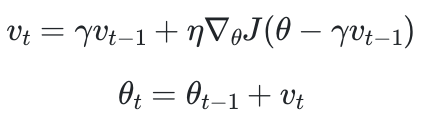
#### ADAM
ADAM

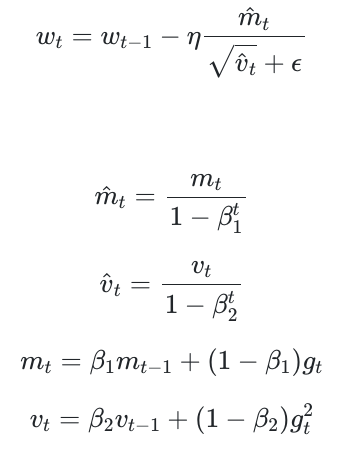

#### NADAM
NADAM , или Nesterov-accelerated Adaptive Moment Estimation , объединяет Adam и Nesterov Momentum . Правило обновления имеет вид:

 - Материал для вдохновления [1](https://www.youtube.com/watch?v=WYme8F384as), [2](https://paperswithcode.com/method/nadam)

In [73]:
def MyСrippledNeuron(features, labels, weights, bias, learning_rate, epochs, loss_fn):
    err_values = []

    for _ in range(1):
        # Для каждого семпла
        X = features
        Y = labels
            
        alpha = weights @ X.T + bias
        print(alpha)
        y_pred = torch.sigmoid(alpha)
        print(y_pred)

        
        # Чтобы разобраться в этом непростом алгоритме реализуем несколько последовательно, а имеено:

        # Наивный градиентый спуск
        loss = loss_fn(y_pred, Y)
        print (loss)
        total_err = loss.sum().item()

        weights.retain_grad()
        alpha.retain_grad()
        bias.retain_grad()

        loss.backward()

        weights = weights -  learning_rate * weights.grad.data
        bias = bias - learning_rate * bias.grad.data

        # Метод Нестерова
        # ADAM
        # NADAM

        err_values.append(round(total_err, 4))
    
    updated_weights = [round(w.item(), 4) for w in weights]
    updated_bias = round(bias.item(), 4)

    return updated_weights, updated_bias, err_values

In [74]:
features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0], [0.5, 0.5], [0, 1]]
labels = [1, 0, 0, 0, 1]
initial_weights = [0.1, -0.2]
initial_bias = 0.0
learning_rate = 0.1
epochs = 500

features = torch.tensor(features,        dtype=torch.float32)
labels   = torch.tensor(labels,          dtype=torch.long)
weights  = torch.tensor(initial_weights, dtype=torch.float32, requires_grad=True)
bias     = torch.tensor(initial_bias,    dtype=torch.float32, requires_grad=True)

In [75]:
from torch import nn

updated_weights, updated_bias, EX3_GD_values =  MyСrippledNeuron(
    features = features, 
    labels = labels, 
    weights = weights, 
    bias = bias, 
    learning_rate = 0.001,
    epochs = epochs,
    loss_fn = nn.NLLLoss()
)

EX3_GD_weights = updated_weights
EX3_GD_bias = updated_bias

print("Updated Weights:", updated_weights)
print("Updated Bias:", updated_bias)
print("NLL Values:", EX3_GD_values)


tensor([-0.3000,  0.0000,  0.3000, -0.0500, -0.2000], grad_fn=<AddBackward0>)
tensor([0.4256, 0.5000, 0.5744, 0.4875, 0.4502], grad_fn=<SigmoidBackward0>)
tensor(-0.5000, grad_fn=<NllLossBackward0>)
Updated Weights: [0.1005, -0.1998]
Updated Bias: 0.0003
NLL Values: [-0.5]


In [77]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

points = np.hstack((features, labels.view(-1,1)))
colors = ["red" if label else "blue" for label in labels]

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

Z1 = 1 / (1 + np.exp(-(nll_weights[0] * X + nll_weights[1] * Y + nll_bias)))
Z2 = 1 / (1 + np.exp(-(EX3_GD_weights[0] * X + EX3_GD_weights[1] * Y + EX3_GD_bias)))

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]],
                    subplot_titles=("NLLLoss", "MSELoss"))

fig.add_trace(go.Surface(z=Z1, x=X, y=Y, opacity=0.5, colorscale='Viridis', name='Probability'), row=1, col=1)
fig.add_trace(go.Surface(z=Z2, x=X, y=Y, opacity=0.5, colorscale='Cividis', name='Probability'), row=1, col=2)


for i in range(len(points)):
    # Координаты точки
    px, py, pz = points[i]

    # Вычисляем значения на поверхностях для каждой точки
    z1_val = 1 / (1 + np.exp(-(nll_weights[0] * px + nll_weights[1] * py + nll_bias)))
    z2_val = 1 / (1 + np.exp(-(mse_weights[0] * px + mse_weights[1] * py + mse_bias)))
    
    # Формируем всплывающие подсказки для каждой точки
    hover_text_1 = f"Point ({px}, {py}, {pz})<br>P(1)={z1_val:.2f}"
    hover_text_2 = f"Point ({px}, {py}, {pz})<br>P(1)={z2_val:.2f}"

    # Добавляем точки в первое окно (первая поверхность)
    fig.add_trace(go.Scatter3d(x=[px], y=[py], z=[pz],
                               mode='markers+text',
                               marker=dict(size=6, color=colors[i]),
                               text=hover_text_1, hoverinfo="text",
                               name=f'Point {i+1}'), row=1, col=1)
    
    # Добавляем точки во второе окно (вторая поверхность)
    fig.add_trace(go.Scatter3d(x=[px], y=[py], z=[pz],
                               mode='markers+text',
                               marker=dict(size=6, color=colors[i]),
                               text=hover_text_2, hoverinfo="text",
                               name=f'Point {i+1}'), row=1, col=2)

fig.show()